### Amazon firmasına yapılnan yorumların değerlendirilmesi

In [1]:
!pip install nltk

In [2]:
# NLTK - Natural Language Toolkit

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import scipy as sp

In [5]:
import nltk

In [6]:
from nltk.tokenize import sent_tokenize

#cümle ayırma

In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification algoritmaları
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier



gb=GradientBoostingClassifier()
d=DecisionTreeClassifier()
g=GaussianNB()
b=BernoulliNB()
lr=LogisticRegression()
r=RandomForestClassifier()
nb=MultinomialNB()


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word

from nltk.stem.snowball import SnowballStemmer

from wordcloud import WordCloud


import seaborn as sns
import numpy as np
import scipy as sp

import nltk
from nltk.tokenize import sent_tokenize

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
#Bir NLP projesinde yapilmasi gerekenler
#1- Hepsine kucuk harfe cevir
#2- Rakamlari at
#3- satir sonrlarini kaldir
#4- Noktalama isaretlerini kaldir
#5- Tokenize et
#6- Ekleri kaldir koklerini bul
#7- Stopwordsleri kaldir
#8- N-gram iki kelime veya 3 vey N kelimeyi siyak sibak look for  look up Dondu donmedi

In [9]:
df=pd.read_csv("amazon.csv")

In [10]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1.370131e+09,"06 2, 2013"
1,1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1.290643e+09,"11 25, 2010"
2,2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1.283990e+09,"09 9, 2010"
3,3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1.290557e+09,"11 24, 2010"
4,4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1.317254e+09,"09 29, 2011"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28269 entries, 0 to 28268
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      28269 non-null  int64  
 1   reviewerID      28269 non-null  object 
 2   asin            28269 non-null  object 
 3   reviewerName    28036 non-null  object 
 4   helpful         28269 non-null  object 
 5   reviewText      28258 non-null  object 
 6   overall         28269 non-null  int64  
 7   summary         28269 non-null  object 
 8   unixReviewTime  28268 non-null  float64
 9   reviewTime      28268 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.2+ MB


In [12]:
df.shape

(28269, 10)

In [13]:
pip install wordcloud

In [14]:
df["reviewText"].iloc[0]

'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!'

<Axes: >

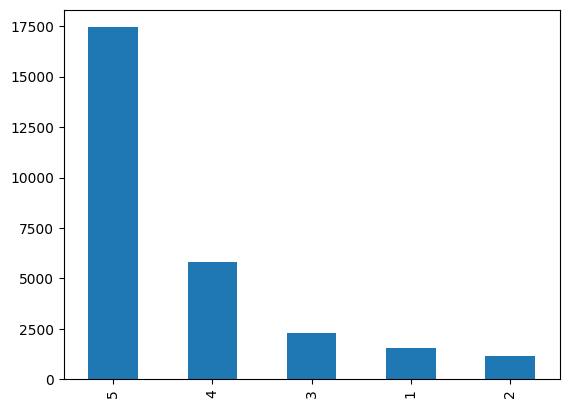

In [15]:
df.overall.value_counts().plot.bar()

In [ ]:
df['reviewText']=df['reviewText'].str.lower() #kucuk harfe cevir'
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldir
df['reviewText']=df['reviewText'].str.replace('\d+','') # rakamlari yoket
df['reviewText']=df['reviewText'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirdik

In [ ]:
df["reviewText"].iloc[0]

'we got this gps for my husband who is an otr over the road trucker  very impressed with the shipping time it arrived a few days earlier than expected  within a week of use however it started freezing up could of just been a glitch in that unit  worked great when it worked  will work great for the normal person as well but does have the trucker option the big truck routes  tells you when a scale is coming up ect  love the bigger screen the ease of use the ease of putting addresses into memory  nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and thats just my luck  i contacted the seller and within minutes of my email i received a email back with instructions for an exchange very impressed all the way around'

In [ ]:
df.isnull().sum()

Unnamed: 0          0
reviewerID          0
asin                0
reviewerName      373
helpful             0
reviewText         37
overall             0
summary             0
unixReviewTime      0
reviewTime          1
dtype: int64

In [16]:
df.drop("reviewerName",axis=1,inplace=True)

In [17]:
df.isnull().sum()

Unnamed: 0         0
reviewerID         0
asin               0
helpful            0
reviewText        11
overall            0
summary            0
unixReviewTime     1
reviewTime         1
dtype: int64

In [18]:
df.head()

,Unnamed: 0,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,AO94DHGC771SJ,0528881469,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1.370131e+09,"06 2, 2013"
1,1,AMO214LNFCEI4,0528881469,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1.290643e+09,"11 25, 2010"
2,2,A3N7T0DY83Y4IG,0528881469,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1.283990e+09,"09 9, 2010"
3,3,A1H8PY3QHMQQA0,0528881469,"[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1.290557e+09,"11 24, 2010"
4,4,A24EV6RXELQZ63,0528881469,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1.317254e+09,"09 29, 2011"


In [19]:
df.drop("reviewerID",axis=1,inplace=True)

In [20]:
df.head()

,Unnamed: 0,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,0528881469,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1.370131e+09,"06 2, 2013"
1,1,0528881469,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1.290643e+09,"11 25, 2010"
2,2,0528881469,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1.283990e+09,"09 9, 2010"
3,3,0528881469,"[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1.290557e+09,"11 24, 2010"
4,4,0528881469,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1.317254e+09,"09 29, 2011"


In [21]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [22]:
df.head()

,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0528881469,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1.370131e+09,"06 2, 2013"
1,0528881469,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1.290643e+09,"11 25, 2010"
2,0528881469,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1.283990e+09,"09 9, 2010"
3,0528881469,"[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1.290557e+09,"11 24, 2010"
4,0528881469,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1.317254e+09,"09 29, 2011"


In [23]:
df['reviewText']=df['reviewText'].str.lower() #kucuk harfe cevir'
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldir
df['reviewText']=df['reviewText'].str.replace('\d+','') # rakamlari yoket
df['reviewText']=df['reviewText'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirdik

In [25]:
df["reviewText"].iloc[0]

'we got this gps for my husband who is an otr over the road trucker  very impressed with the shipping time it arrived a few days earlier than expected  within a week of use however it started freezing up could of just been a glitch in that unit  worked great when it worked  will work great for the normal person as well but does have the trucker option the big truck routes  tells you when a scale is coming up ect  love the bigger screen the ease of use the ease of putting addresses into memory  nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and thats just my luck  i contacted the seller and within minutes of my email i received a email back with instructions for an exchange very impressed all the way around'

In [26]:
df.head()

,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0528881469,"[0, 0]",we got this gps for my husband who is an otr o...,5,Gotta have GPS!,1.370131e+09,"06 2, 2013"
1,0528881469,"[12, 15]",im a professional otr truck driver and i bough...,1,Very Disappointed,1.290643e+09,"11 25, 2010"
2,0528881469,"[43, 45]",well what can i say ive had this unit in my t...,3,1st impression,1.283990e+09,"09 9, 2010"
3,0528881469,"[9, 10]",not going to write a long review even thought ...,2,"Great grafics, POOR GPS",1.290557e+09,"11 24, 2010"
4,0528881469,"[0, 0]",ive had mine for a year and heres what we got ...,1,"Major issues, only excuses for support",1.317254e+09,"09 29, 2011"


In [27]:
df.overall.value_counts().sort_values(ascending=False)

5    17435
4     5819
3     2280
1     1561
2     1174
Name: overall, dtype: int64

In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

asin              0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [30]:
df.shape

(28257, 7)

In [31]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem.porter import PorterStemmer

from sklearn.svm import SVC
s=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

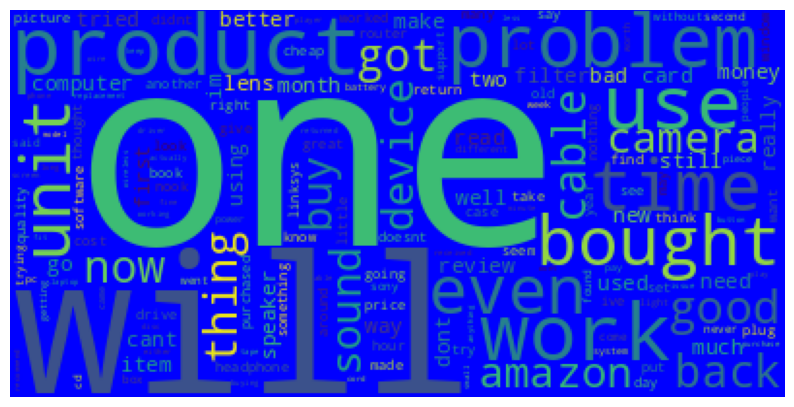

In [35]:
Text1=df.query("overall==1")['reviewText']
wc(Text1,'blue')

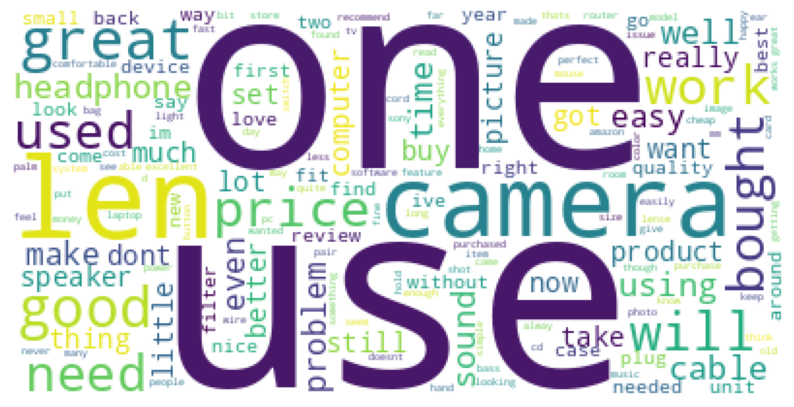

In [36]:
Text1=df.query("overall==5")['reviewText']
wc(Text1,'white')

In [37]:
# Stopwords ; anlamsız kelimeleri çıkarıyor

In [38]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from nltk.stem import PorterStemmer  #ekleri kaldırır

In [41]:
ps=PorterStemmer()

In [42]:
#TF/IDF turn frequency   / Inverse Document Frequency
#bir kelime hangi cülede kaç kez geçiyor/ bir kelime bir sayfada kaç kez geçiyor

In [43]:
#Sentiment Analizi - Pozoitf negatif nötr

In [44]:
df.columns

Index(['asin', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime',
       'reviewTime'],
      dtype='object')

In [45]:
x=df[['asin', 'helpful', 'summary', 'unixReviewTime',
       'reviewTime']]

y=df[['overall', 'reviewText']]

In [46]:
y.head()

,overall,reviewText
0,5,we got this gps for my husband who is an otr o...
1,1,im a professional otr truck driver and i bough...
2,3,well what can i say ive had this unit in my t...
3,2,not going to write a long review even thought ...
4,1,ive had mine for a year and heres what we got ...


<Axes: xlabel='overall', ylabel='count'>

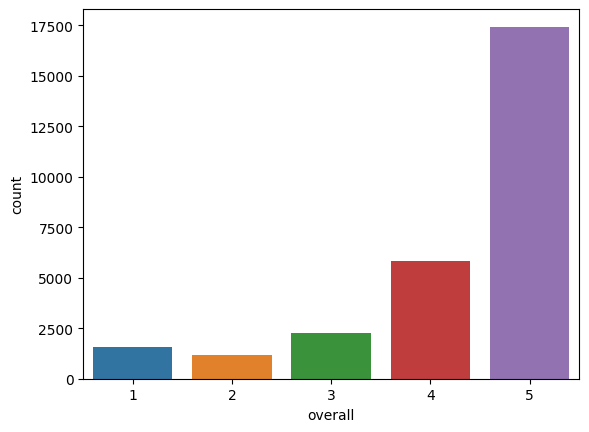

In [48]:
sns.countplot(x=df['overall'])

In [49]:
iyivekotu=y[(y['overall']==5)| (y['overall']==1)]

In [50]:
iyivekotu.head(10)
#index aradan çıkanlardan dolayı bozulmuş oldu

,overall,reviewText
0,5,we got this gps for my husband who is an otr o...
1,1,im a professional otr truck driver and i bough...
4,1,ive had mine for a year and heres what we got ...
5,5,i am using this with a nook hd it works as des...
7,5,this adaptor is real easy to setup and use rig...
9,5,this product really works great but i found th...
11,5,bought for a spare for my nook hd and it fit ...
12,5,my son crewed my hd charger cord so i needed a...
14,5,i lost my bn original cable i looked around f...
18,5,this is a great buy compared to a or more a r...


In [51]:
iyivekotu.shape

(18986, 2)

In [52]:
iyivekotu.reset_index(drop=True,inplace=True)

#index i tekrar reset yapıp sıralayan kod

In [53]:
yes=iyivekotu[iyivekotu['overall']=='5']['reviewText']
no=iyivekotu[iyivekotu['overall']=='1']['reviewText']

In [54]:
x=iyivekotu["reviewText"]
y=iyivekotu["overall"]

In [55]:
vect=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [56]:
x=vect.fit_transform(x)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [58]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [59]:
nb=MultinomialNB()

In [60]:
model=nb.fit(x_train,y_train)

In [61]:
pred=nb.predict(x_test)

In [62]:
accuracy_score(pred,y_test)

0.9315429173249078

In [65]:
lr=LogisticRegression()

In [66]:
model=lr.fit(x_train,y_train)

In [67]:
pred=lr.predict(x_test)

In [68]:
accuracy_score(pred,y_test)

0.9528699315429173

In [69]:
b=BernoulliNB()

In [70]:
model=b.fit(x_train,y_train)

In [71]:
pred=b.predict(x_test)

In [72]:
accuracy_score(pred,y_test)

0.9115323854660348

In [73]:
r=RandomForestClassifier()

In [74]:
model=r.fit(x_train,y_train)

In [75]:
pred=r.predict(x_test)

In [76]:
accuracy_score(pred,y_test)

0.9265402843601895

In [77]:
d=DecisionTreeClassifier()

In [78]:
model=d.fit(x_train,y_train)

In [79]:
pred=d.predict(x_test)

In [80]:
accuracy_score(pred,y_test)

0.923117430226435

In [81]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.40      0.49      0.44       237
           5       0.97      0.95      0.96      3561

    accuracy                           0.92      3798
   macro avg       0.68      0.72      0.70      3798
weighted avg       0.93      0.92      0.93      3798



In [82]:
#yeni bir yorum geldiğinde lr=LogisticRegression() modellemesine göre %95 oranında yapılan yorumları anlayabiliyoruz ama %5 kötü yorumlar kaçmış olacak

In [83]:
df.loc[(df['overall']==1)|(df['overall']==2),'sentiment']='negative'
df.loc[(df['overall']==3),'sentiment']='neutral'
df.loc[(df['overall']==4)|(df['overall']==5),'sentiment']='positive'

#Github / Şeyda hanımdan den alındı

In [84]:
df.head()

,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,0528881469,"[0, 0]",we got this gps for my husband who is an otr o...,5,Gotta have GPS!,1.370131e+09,"06 2, 2013",positive
1,0528881469,"[12, 15]",im a professional otr truck driver and i bough...,1,Very Disappointed,1.290643e+09,"11 25, 2010",negative
2,0528881469,"[43, 45]",well what can i say ive had this unit in my t...,3,1st impression,1.283990e+09,"09 9, 2010",neutral
3,0528881469,"[9, 10]",not going to write a long review even thought ...,2,"Great grafics, POOR GPS",1.290557e+09,"11 24, 2010",negative
4,0528881469,"[0, 0]",ive had mine for a year and heres what we got ...,1,"Major issues, only excuses for support",1.317254e+09,"09 29, 2011",negative


In [86]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

#ekleri kaldırıp kökleri bulan fonksiyon

In [89]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [92]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [93]:
#Tokenize Cümledeki kelimeleri ayırmak ve Python listesi haline getirmek

In [94]:
df=df[['overall','reviewText','sentiment']]

In [95]:
df

,overall,reviewText,sentiment
0,5,we got this gps for my husband who is an otr o...,positive
1,1,im a professional otr truck driver and i bough...,negative
2,3,well what can i say ive had this unit in my t...,neutral
3,2,not going to write a long review even thought ...,negative
4,1,ive had mine for a year and heres what we got ...,negative
...,...,...,...
28263,5,i thought i never will need it but one day my ...,positive
28264,5,if you hold on to your old electronics like i ...,positive
28265,4,if you are still using tape for video recordin...,positive
28266,5,we accidently ran two mini dv tapes through th...,positive


In [96]:
df[['polarity','subjectivity']]=df['reviewText'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [97]:
df

,overall,reviewText,sentiment,polarity,subjectivity
0,5,we got this gps for my husband who is an otr o...,positive,0.250000,0.539744
1,1,im a professional otr truck driver and i bough...,negative,0.062441,0.371296
2,3,well what can i say ive had this unit in my t...,neutral,0.091970,0.411656
3,2,not going to write a long review even thought ...,negative,0.059561,0.405242
4,1,ive had mine for a year and heres what we got ...,negative,-0.002932,0.488117
...,...,...,...,...,...
28263,5,i thought i never will need it but one day my ...,positive,0.800000,0.750000
28264,5,if you hold on to your old electronics like i ...,positive,0.200000,0.310000
28265,4,if you are still using tape for video recordin...,positive,0.500000,0.150000
28266,5,we accidently ran two mini dv tapes through th...,positive,-0.138095,0.195238


In [98]:
df.sentiment.value_counts()

positive    23242
negative     2735
neutral      2280
Name: sentiment, dtype: int64

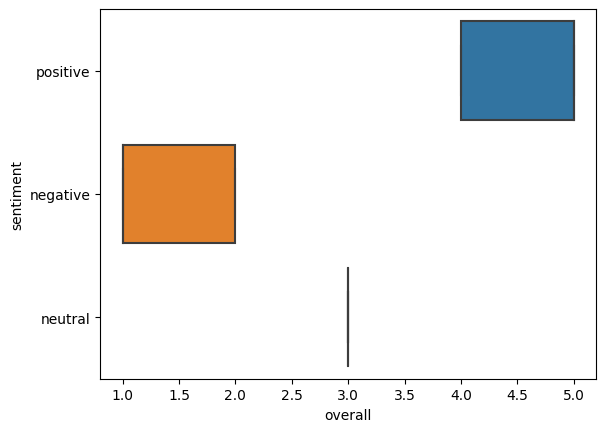

In [100]:
sns.boxplot(y='sentiment',x='overall',data=df);

In [108]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png")) ##cloud.png
    wc=WordCloud(background_color=bgcolor,width=800, height=400,mask=mask,max_words=200,stopwords=STOPWORDS)
    wc.generate(''.join(data))
    plt.figure( figsize=(10,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

#kelime bulutu yapma kodu
#hata veriyor. her ihtilde de aynı şekil ve kelimeler çıkıyor

In [110]:
negative_data=df[df['sentiment']=="negative"]['reviewText']
positive_data=df[df['sentiment']=="positive"]['reviewText']
neutral_data=df[df['sentiment']=="neutral"]['reviewText']

In [114]:
df

,overall,reviewText,sentiment,polarity,subjectivity
0,5,we got this gps for my husband who is an otr o...,positive,0.250000,0.539744
1,1,im a professional otr truck driver and i bough...,negative,0.062441,0.371296
2,3,well what can i say ive had this unit in my t...,neutral,0.091970,0.411656
3,2,not going to write a long review even thought ...,negative,0.059561,0.405242
4,1,ive had mine for a year and heres what we got ...,negative,-0.002932,0.488117
...,...,...,...,...,...
28263,5,i thought i never will need it but one day my ...,positive,0.800000,0.750000
28264,5,if you hold on to your old electronics like i ...,positive,0.200000,0.310000
28265,4,if you are still using tape for video recordin...,positive,0.500000,0.150000
28266,5,we accidently ran two mini dv tapes through th...,positive,-0.138095,0.195238


In [117]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')


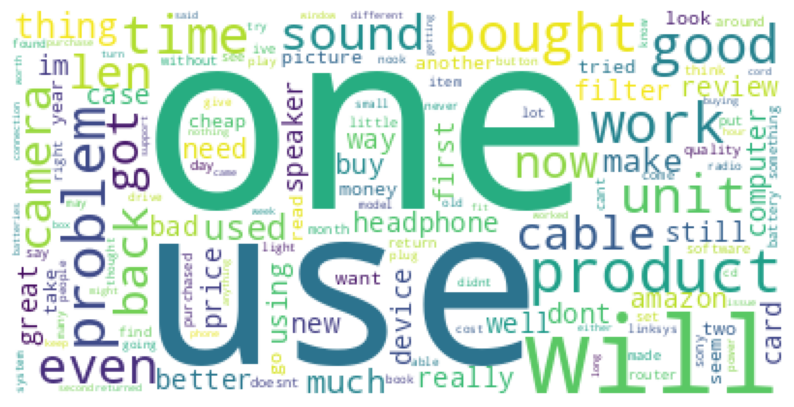

In [118]:
wc(negative_data,'white')

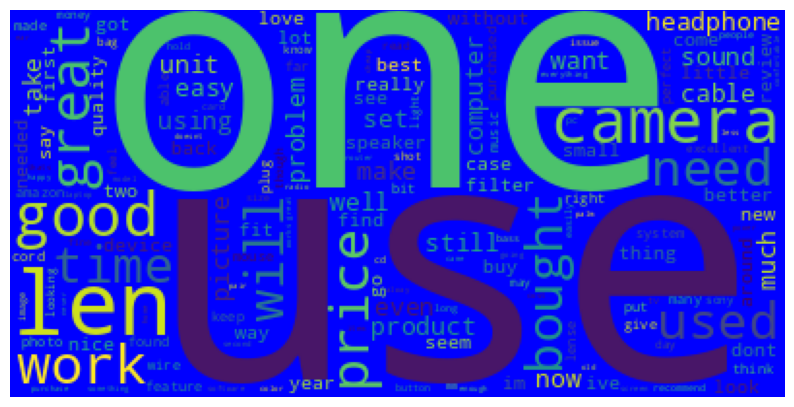

In [119]:
wc(positive_data,'blue')

In [120]:
pip install joblib

In [121]:
import joblib

In [122]:
joblib.dump(model,'olumluolumsuz.joblib')

#bu dosyayı kaydettik. amazon firmsına bunu gönderirsek onlar da gelen mesajları bu dosyadan geçirerek olumlu veya olumsuz mesaj  olup olmadığını anlar

['olumluolumsuz.joblib']